In [10]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Birthday Paradox Simulation

This notebook calculates aspects of a group of people and the likelihood that 1 or more people in the group have the same birthday, based on the group size.

## Overview

The birthday paradox is a famous probability problem that demonstrates how our intuition about probabilities can be misleading. This simulation:

- Tests various group sizes (from 2 to 75 people)
- Runs multiple trials (2000 per group size) to estimate probabilities
- Calculates the probability that at least one pair of people share a birthday
- Visualizes the results with histograms and probability curves

## Key Result: 23 people gives > 

With just 23 people in a group, there's a greater than 50% chance that two people share the same birthday!

(10, 7)
Group size  2 Avg=0.25%
Group size  3 Avg=0.50%
Group size  4 Avg=1.30%
Group size  5 Avg=2.45%
Group size  6 Avg=4.40%
Group size  7 Avg=6.25%
Group size  8 Avg=8.45%
Group size  9 Avg=9.95%
Group size 10 Avg=10.40%
Group size 11 Avg=14.55%
Group size 12 Avg=18.00%
Group size 13 Avg=19.55%
Group size 14 Avg=22.80%
Group size 15 Avg=25.50%
Group size 16 Avg=29.50%
Group size 17 Avg=32.45%
Group size 18 Avg=34.70%
Group size 19 Avg=38.00%
Group size 20 Avg=39.40%
Group size 21 Avg=45.75%
Group size 22 Avg=48.30%
Group size 23 Avg=50.20%
Group size 24 Avg=52.00%
Group size 25 Avg=57.40%
Group size 26 Avg=60.80%
Group size 27 Avg=60.90%
Group size 28 Avg=65.30%
Group size 29 Avg=67.30%
Group size 30 Avg=71.95%
Group size 31 Avg=73.10%
Group size 32 Avg=73.85%
Group size 33 Avg=78.15%
Group size 34 Avg=80.15%
Group size 35 Avg=80.45%
Group size 36 Avg=82.95%
Group size 37 Avg=85.25%
Group size 38 Avg=85.85%
Group size 39 Avg=87.50%
Group size 40 Avg=89.10%
Group size 41 Avg=90.25%


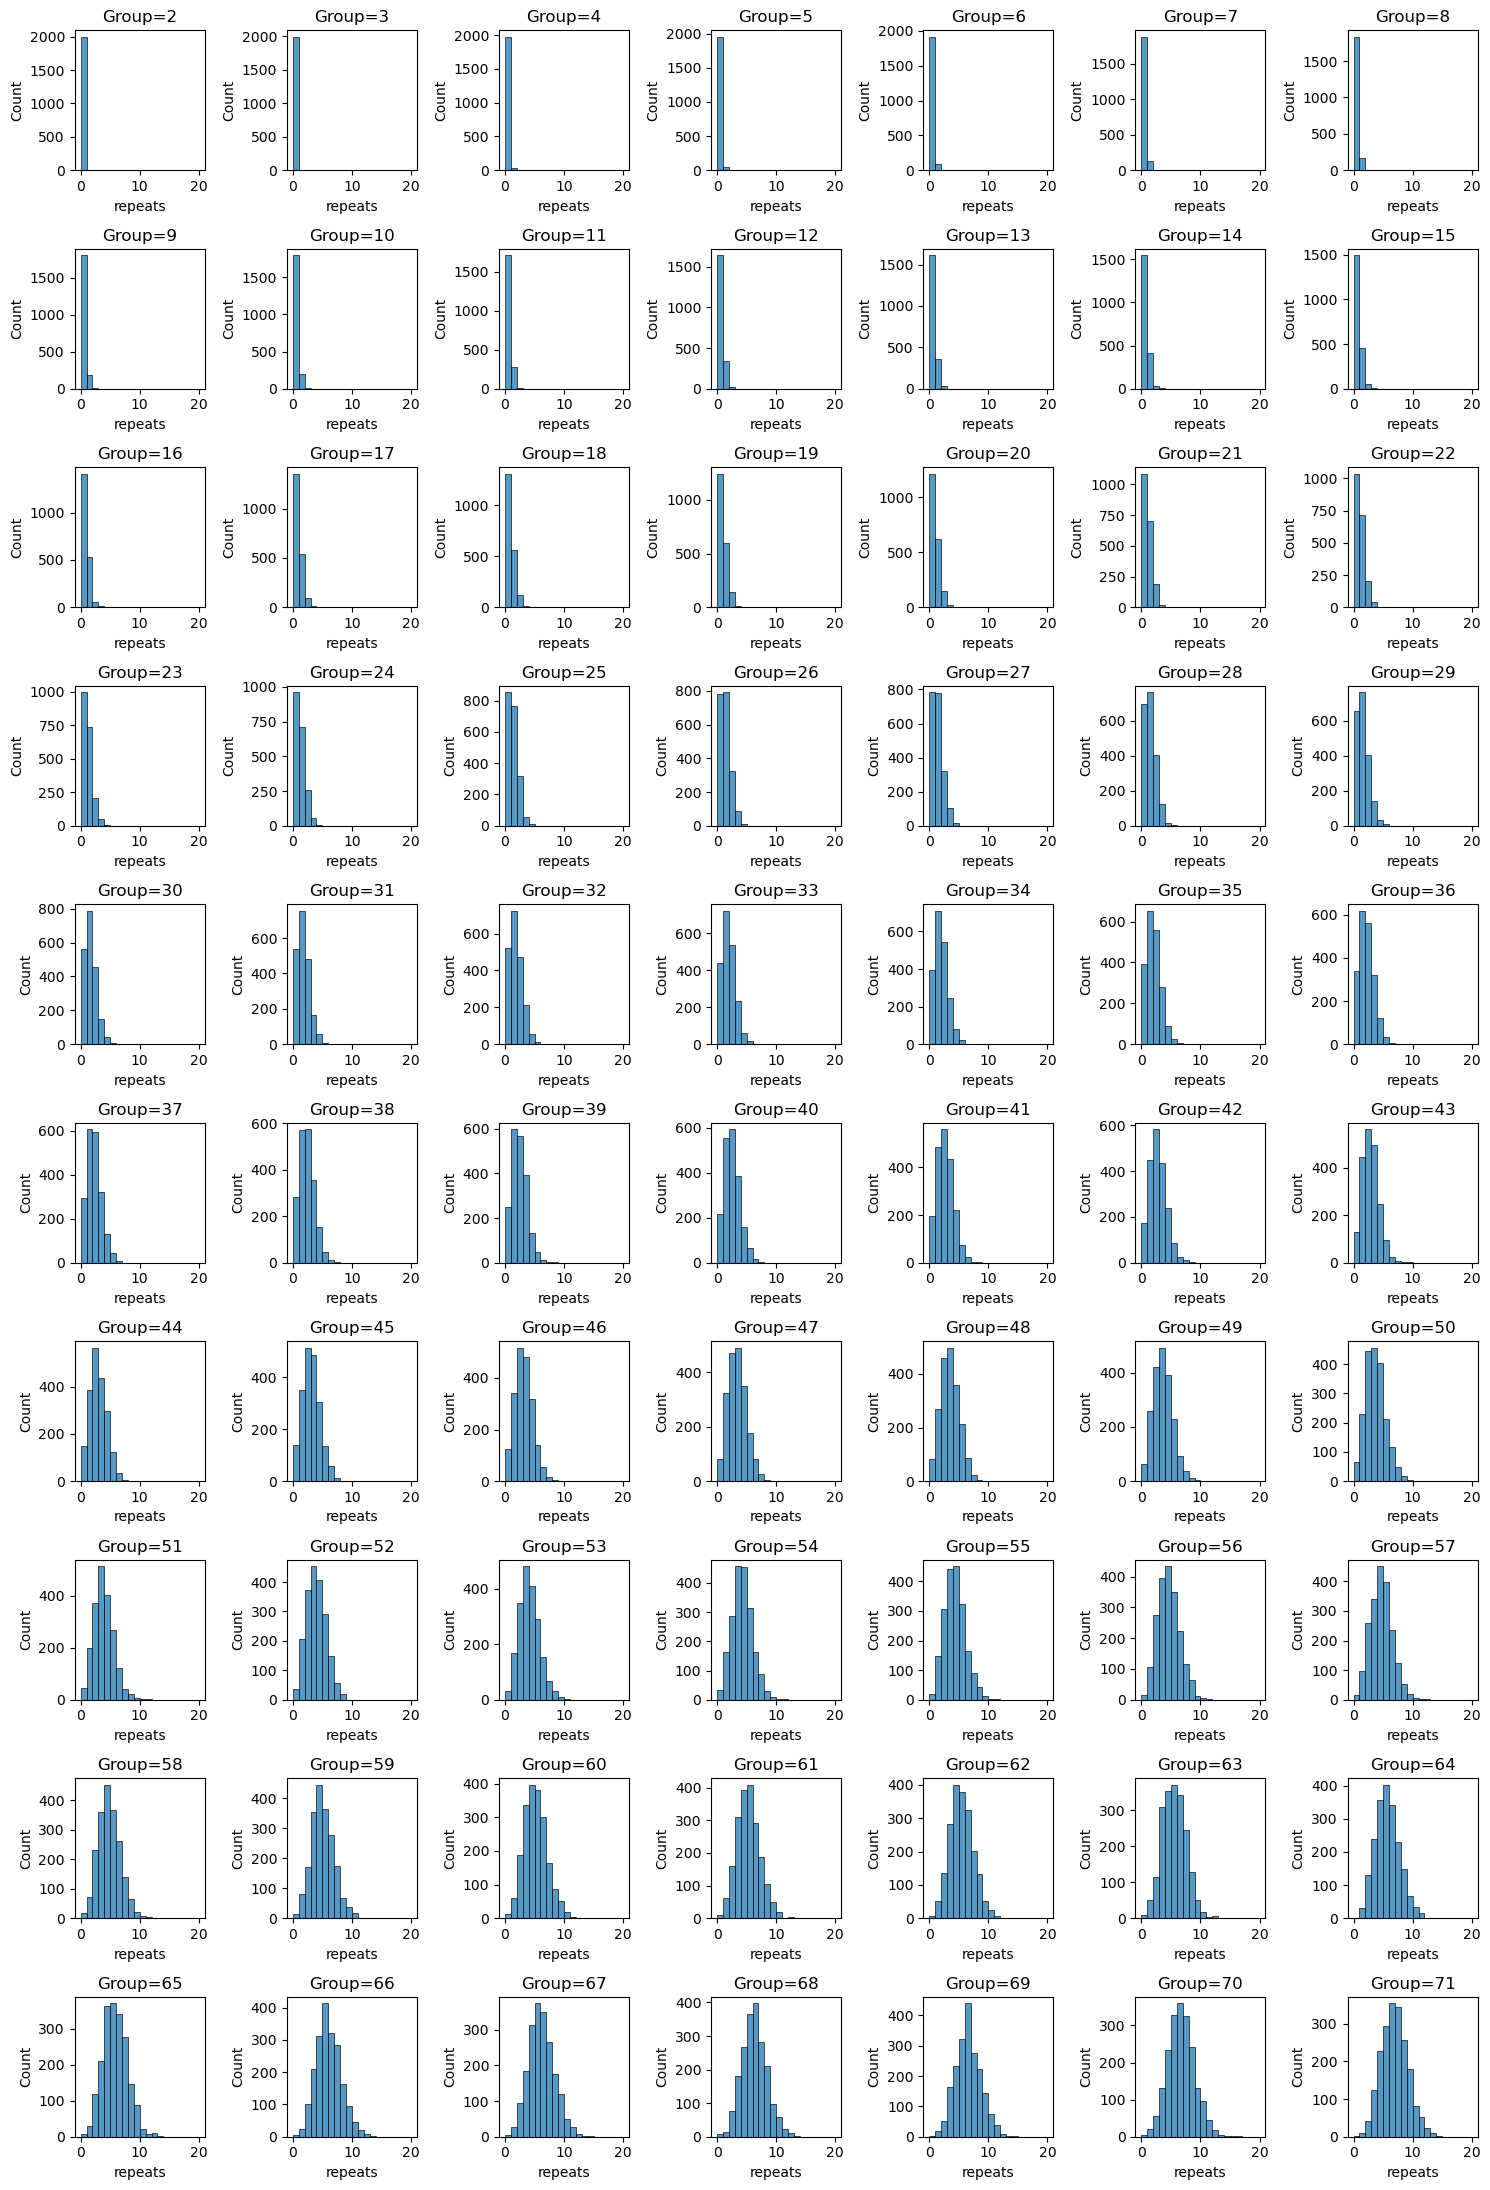

In [11]:
n = 72      # max group size
m = 2000    # samples used for estimating probabilities
data = {}   # samples data
pdata = []  # sample summary data
# Create a figure and a grid of subplots
fig, axes = plt.subplots(10, 7, figsize=(15, 22)) # 1 row, 3 columns
print(axes.shape)
for i in range(2,n):
    data[i] = []
    for j in range(m):
        x = np.random.choice(range(365), i)
        # count repeated days - don't distinguish between e.g.
        # 2 2 2 2 => 4-1=3 and 3 3 4 4 4 => 5-2=3
        data[i].append(len(x) - len(set(x)))
    p = np.count_nonzero(data[i])/m
    pdata.append(p)
    print("Group size {:2} Avg={:2.2%}".format(i, p))
    j, k = int((i-2)/7), (i-2)%7
    #print(i,j,k)
    sns.histplot(data={"repeats": np.array(data[i])}, x="repeats", binrange=(0,20), bins=20, ax=axes[j,k])
    axes[j,k].set_title(f'Group={i}')
    # plt.hist(data[i], bins=20, range=(0,20), density=True)
plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

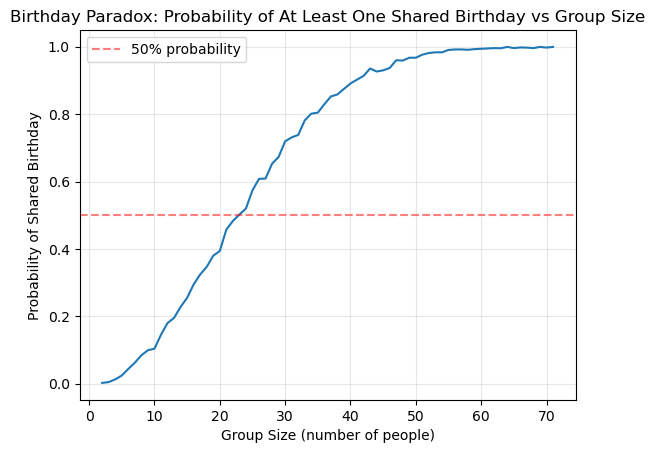

In [12]:
plt.plot(range(2,n), pdata)
plt.xlabel('Group Size (number of people)')
plt.ylabel('Probability of Shared Birthday')
plt.title('Birthday Paradox: Probability of At Least One Shared Birthday vs Group Size')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='50% probability')
plt.legend()
plt.show()

## Results Interpretation

The plot above shows the **cumulative distribution function (CDF)** of the birthday paradox. This curve represents the probability that at least one pair of people in a group shares the same birthday, as a function of group size.

### Key Observations:

- **Rapid Growth**: The probability increases rapidly in the range of 15-40 people, showing the counterintuitive nature of the paradox.
- **50% Threshold**: The red dashed line marks the 50% probability level. Notice that with just **23 people**, the probability exceeds 50%.
- **Near Certainty**: With around 50 people, the probability approaches nearly 90%, and with 70 people it's almost certain (>99%) that at least two people share a birthday.

### Why This is Surprising:

Most people intuitively expect you'd need around 183 people (half of 365) to have a 50% chance of a match. However, we're not looking for a *specific* birthday match, but *any* pair matching. With 23 people, there are **253 possible pairs** (23×22/2), which creates many opportunities for a collision.

Group size 3 p = 0.00%
Group size 4 p = 0.00%
Group size 5 p = 0.00%
Group size 6 p = 0.00%
Group size 7 p = 0.00%
Group size 8 p = 0.00%
Group size 9 p = 0.10%
Group size 10 p = 0.15%
Group size 20 p = 0.80%
Group size 30 p = 3.30%
Group size 40 p = 6.50%
Group size 50 p = 12.50%
Group size 60 p = 21.85%
Group size 70 p = 30.45%
Group size 80 p = 42.80%
Group size 90 p = 51.50%
Group size 100 p = 63.65%
Group size 110 p = 73.75%
Group size 120 p = 82.90%
Group size 130 p = 90.55%
Group size 140 p = 94.15%


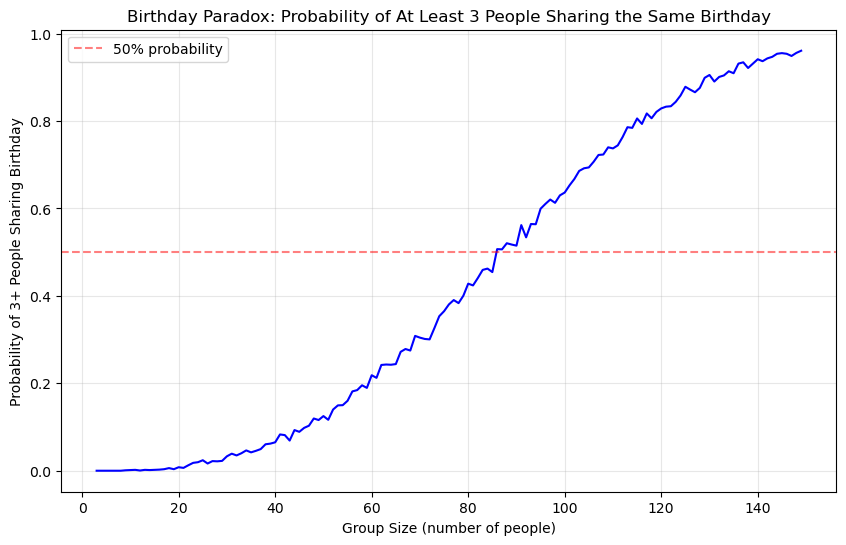


50% threshold reached at approximately 86 people


In [13]:
# Simulation for 3 people sharing the same birthday
n = 150  # Need larger group sizes for 3-way matches
m = 2000
pdata_triple = []

for i in range(3, n):
    matches = 0
    for j in range(m):
        birthdays = np.random.choice(range(365), i)
        # Count occurrences of each birthday
        _, counts = np.unique(birthdays, return_counts=True)
        # Check if any birthday appears 3 or more times
        if np.any(counts >= 3):
            matches += 1
    p = matches / m
    pdata_triple.append(p)
    if i % 10 == 0 or i < 10:
        print("Group size {} p = {:.2%}".format(i, p))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(3, n), pdata_triple, color='blue')
plt.xlabel('Group Size (number of people)')
plt.ylabel('Probability of 3+ People Sharing Birthday')
plt.title('Birthday Paradox: Probability of At Least 3 People Sharing the Same Birthday')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='50% probability')
plt.legend()
plt.show()

# Find approximate group size for 50% probability
over = False
for idx, p in enumerate(pdata_triple):
    if p >= 0.5 and not over:
        over = True
        print(f"\n50% threshold reached at approximately {idx + 3} people")